In these type of problems we consider a substance that is dissolved in a liquid placed in a container. Liquid will be entering and leaving the container. The liquid entering the tank may or may not contain more of the substance dissolved in it. But obviously, the liquid leaving the tank will contain the substance dissolved in it (for example, salt solution).

If $Q(t)$ gives the amount of the substance dissolved in the liquid in the container at any time $t$, we can develop a differential equation that, when solved, will give us an expression for $Q(t)$.

The main assumption here is that the concentration of the substance in the liquid is uniform throughout the tank.

Rate of change of $Q(t)$ = Rate at which $Q(t)$ enters the tank - Rate at which $Q(t)$ exits the tank

Rate of change of $Q(t)$ is given by $\frac{dQ}{dt} = Q'(t)$, and rate at which $Q(t)$ enters the tank is given by (flow rate of the liquid entering $[r_{1}]$) x (concentration of the substance present in the liquid.

# Example

A tank initially contains 600 L of solution in which there is dissolved 1500 g of chemical. A solution containing 5 g/L of the chemical flows into the tank at a rate of 6 L/min, and the well-stirred mixture flows out at a rate of 3 L/min. Determine the concentration of chemical in the tank after one hour.

In [13]:
from sympy import *
t = Symbol('t')
# Quantity of solute in the solution
Q = Function("Q")(t)
initialQuantity = 1500
# Flow rates in litres per minute
entryRate = 6
exitRate = 3
# Concentrations in grams per litre
initialConc = 1500/600 # i.e. Q(0) = 1500 grams
entryConc = 5
exitConc = Q/(600 + (6 - 3)*t)

In [14]:
# Differential equation
de = Eq(Q.diff(t), entryConc*entryRate - exitConc*exitRate)
de

Eq(Derivative(Q(t), t), 30 - 3*Q(t)/(3*t + 600))

In [15]:
# General equation
ge = dsolve(de)
ge

Eq(Q(t), (C1 + 15*t**2 + 6000*t)/(t + 200))

In [16]:
# At t = 0
ge.subs({Q:initialQuantity, t:0})

Eq(1500, C1/200)

Solving for C1, we see it is 1500 x 500

In [17]:
# Particular equation
pe = ge.subs({Symbol('C1'):1500*200})
pe

Eq(Q(t), (15*t**2 + 6000*t + 300000)/(t + 200))

In [18]:
# After 1 hour i.e. t = 60
pe.subs({t:60})

Eq(Q(60), 35700/13)

In [19]:
finalSoluteQuantity = 35700/7
finalSolutionQuantity = 600 - 3*60
# Since every minute, 6 - 3 = 3 litres of solution gets drained out.

In [20]:
finalConc = finalSoluteQuantity / finalSolutionQuantity
finalConc

12.142857142857142

The concentration in the tank after 1 hour is around 12.143 grams per litre.

# Electric circuit

For LCR (RLC) circuit take the input from user (e,l,c,r) and write a python program to prove the circuit is underdamped. Also plot the graph for the same. (Hint: R < 2*sqrt(l/c))

In [66]:
from numpy import sqrt
e = float(input("Enter voltage: "))
l = float(input("Enter inductance: "))
c = float(input("Enter capacitance: "))
r = float(input("Enter resistance: "))
if r < 2*sqrt(l/c): print("Underdamped!")
else: print("Not underdamped!")

Enter voltage: 10
Enter inductance: 12
Enter capacitance: 3
Enter resistance: 1
Underdamped!


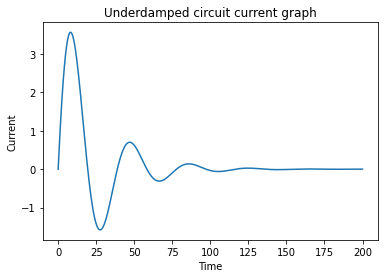

In [77]:
import matplotlib.pyplot as plt
def f(q, i, t):
    return i
    # Since dq/dt = i
def h(q, i, t):
    return (e - i*r - q/c)/l
    # Derivative of i

# Loop for entering values
t = 0     # Time point
i = 0     # Initial current
q = 0     # Initial charge
dt = 0.1  # Time step length (increment time points by this amount)
T = []    # Stores time points...
I = []    # Stores electric current values...
Q = []    # Stores charge values...
while t < 200:
    T.append(t)
    I.append(i)
    Q.append(q)
    q = q + dt*f(q, i, t)
    i = i + dt*h(q, i, t)
    t = t + dt
plt.plot(T, I)
plt.title("Underdamped circuit current graph")
plt.xlabel("Time")
plt.ylabel("Current")
None